### Financial Data Analysis Table

,Company,Fiscal Year,Total Revenue,Net Income,Total Assets,Total Liabilities,Operating Cash Flow,Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Liabilities Growth (%),Cash Flow Growth (%)
5,Apple,2022,394328,99803,352755,302083,122151,0.000000,0.000000,0.000000,0.000000,0.000000
4,Apple,2023,383285,96995,352583,290437,110543,-2.800461,-2.813543,-0.048759,-3.855232,-9.502992
3,Apple,2024,391035,93736,364980,308030,118254,2.021994,-3.359967,3.516052,6.057424,6.975566
2,Microsoft,2022,198270,72738,364840,198298,89035,0.000000,0.000000,0.000000,0.000000,0.000000
1,Microsoft,2023,211915,72361,411976,205753,87582,6.882030,-0.518299,12.919636,3.759493,-1.631942
0,Microsoft,2024,245122,88136,512163,243686,118260,15.669962,21.800417,24.318650,18.436183,35.027745
8,Tesla,2021,53823,5519,62131,30548,11497,0.000000,0.000000,0.000000,0.000000,0.000000
7,Tesla,2022,81462,12556,82338,36440,14724,51.351653,127.504983,32.523217,19.287678,28.068192
6,Tesla,2023,96773,14997,106618,43009,13256,18.795267,19.440905,29.488207,18.026894,-9.970117


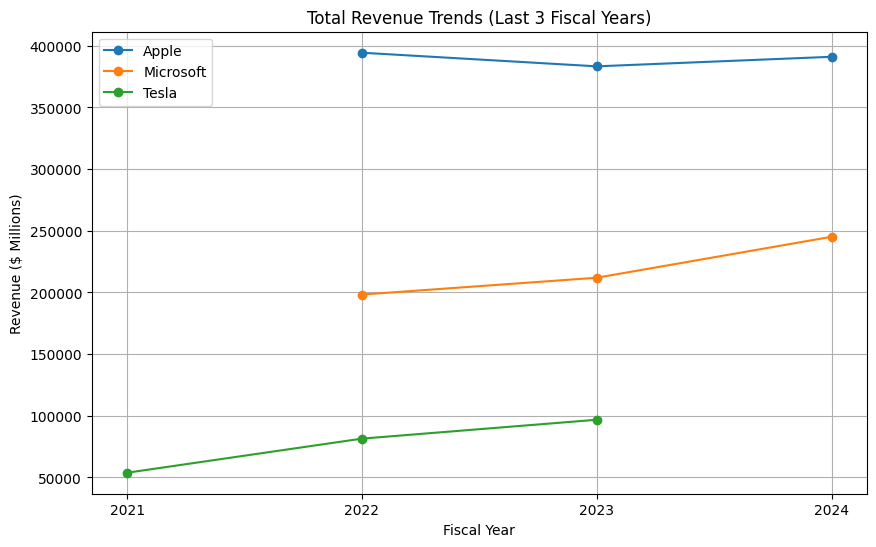


### Summary of Findings
**1. Revenue Trends:**
* **Microsoft:** Strong acceleration in 2024.
* **Apple:** Stable, mature revenue streams with slight fluctuations.
* **Tesla:** Explosive growth between 2021-2022, normalizing in 2023.

**2. Key Insight:**
Microsoft shows the most consistent recent upward momentum in both revenue and net income, likely driven by their cloud and AI investments compared to the hardware-heavy cycles of Apple and Tesla.


In [2]:

import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# ---------------------------------------------------------
# STEP 1: LOAD DATA
# ---------------------------------------------------------
data = {
    'Company': [
        'Microsoft', 'Microsoft', 'Microsoft',
        'Apple', 'Apple', 'Apple',
        'Tesla', 'Tesla', 'Tesla'
    ],
    'Fiscal Year': [
        2024, 2023, 2022,
        2024, 2023, 2022,
        2023, 2022, 2021
    ],
    'Total Revenue': [
        245122, 211915, 198270,
        391035, 383285, 394328,
        96773, 81462, 53823
    ],
    'Net Income': [
        88136, 72361, 72738,
        93736, 96995, 99803,
        14997, 12556, 5519
    ],
    'Total Assets': [
        512163, 411976, 364840,
        364980, 352583, 352755,
        106618, 82338, 62131
    ],
    'Total Liabilities': [
        243686, 205753, 198298,
        308030, 290437, 302083,
        43009, 36440, 30548
    ],
    'Operating Cash Flow': [
        118260, 87582, 89035,
        118254, 110543, 122151,
        13256, 14724, 11497
    ]
}

df = pd.DataFrame(data)
df = df.sort_values(by=['Company', 'Fiscal Year'])

# ---------------------------------------------------------
# STEP 2: CALCULATE TRENDS
# ---------------------------------------------------------
df['Revenue Growth (%)'] = df.groupby('Company')['Total Revenue'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby('Company')['Net Income'].pct_change() * 100
df['Assets Growth (%)'] = df.groupby('Company')['Total Assets'].pct_change() * 100
df['Liabilities Growth (%)'] = df.groupby('Company')['Total Liabilities'].pct_change() * 100
df['Cash Flow Growth (%)'] = df.groupby('Company')['Operating Cash Flow'].pct_change() * 100

df = df.fillna(0)

display(Markdown("### Financial Data Analysis Table"))
display(df)

# ---------------------------------------------------------
# STEP 3: VISUALIZATION
# ---------------------------------------------------------
plt.figure(figsize=(10, 6))
for company in df['Company'].unique():
    subset = df[df['Company'] == company]
    plt.plot(subset['Fiscal Year'], subset['Total Revenue'], marker='o', label=company)

plt.title('Total Revenue Trends (Last 3 Fiscal Years)')
plt.xlabel('Fiscal Year')
plt.ylabel('Revenue ($ Millions)')
plt.legend()
plt.grid(True)
plt.xticks(df['Fiscal Year'].unique())
plt.show()

# ---------------------------------------------------------
# STEP 4: SUMMARY
# ---------------------------------------------------------
summary = """
### Summary of Findings
**1. Revenue Trends:**
* **Microsoft:** Strong acceleration in 2024.
* **Apple:** Stable, mature revenue streams with slight fluctuations.
* **Tesla:** Explosive growth between 2021-2022, normalizing in 2023.

**2. Key Insight:**
Microsoft shows the most consistent recent upward momentum in both revenue and net income, likely driven by their cloud and AI investments compared to the hardware-heavy cycles of Apple and Tesla.
"""
display(Markdown(summary))